# GCNによるKarateclub埋め込み

デフォルトはノード0,4,8,24が教師データ

! conda activate kmedoids

In [1]:

import time
import networkx as nx
from torch_geometric.utils.convert import to_networkx, from_networkx
from torch_geometric.datasets import KarateClub
import matplotlib.pyplot as plt
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
import gcn
from gcn import GCN
import numpy as np
from sklearn_extra.cluster import KMedoids #K-Medoids
from sklearn.metrics.cluster import adjusted_rand_score #ARI
import random
import sys


/opt/anaconda3/envs/kmedoids/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


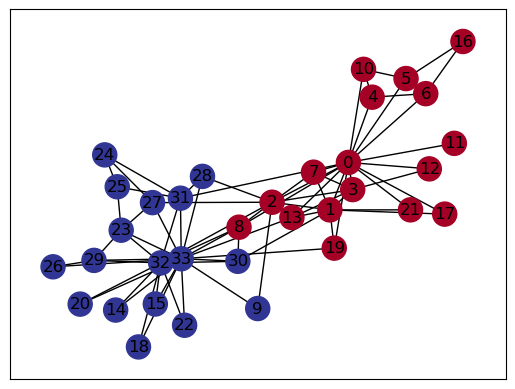

In [2]:
TRUE_LABEL = gcn.draw_karateclub()


In [3]:
#すべてを学習データで学習させるか
TRAIN_ALL = False 

# デフォルトの一部の学習データ(ノード0,4,8,24)で学習させるか。Falseの場合ランダム
DEFAULT = False

#ランダムのデータで学習するばいの学習データ(ノード情報)数
NUM_TRAIN = 10

#エポック数
EPOCH = 40

#学習状況及び結果を図示するか
VIEW_TRAIN = False

#実行回数
TIMES = 50

if NUM_TRAIN>34 :
    sys.exit("ノード数は34以下の必要があります")



===========================1回目============================
Trained_node_number_is : [4, 7, 8, 14, 15, 18, 20, 23, 29, 31]


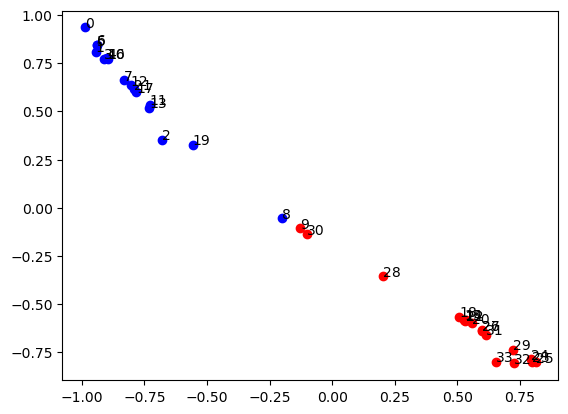

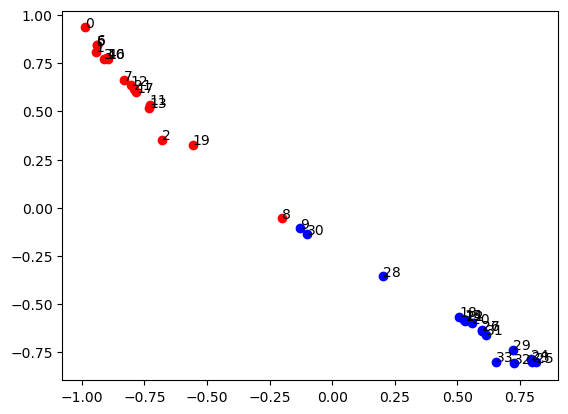

1回目 ARI : 1.0

===========================2回目============================
Trained_node_number_is : [3, 5, 11, 14, 20, 22, 24, 25, 27, 32]


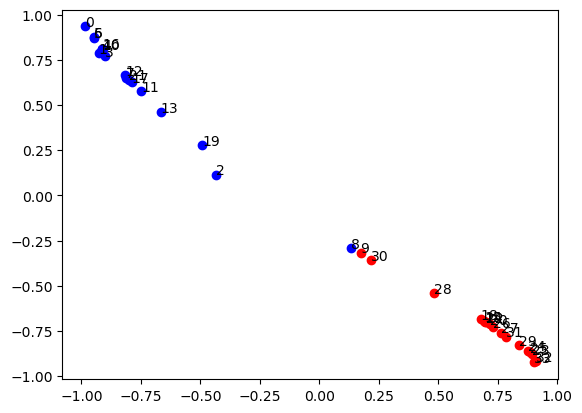

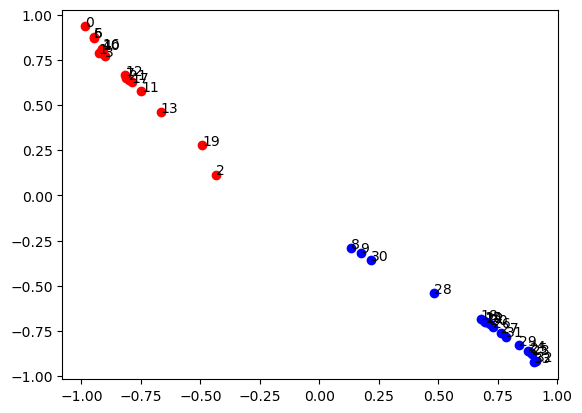

2回目 ARI : 0.8822575413558222

===========================3回目============================
Trained_node_number_is : [0, 1, 2, 10, 12, 19, 24, 28, 30, 31]


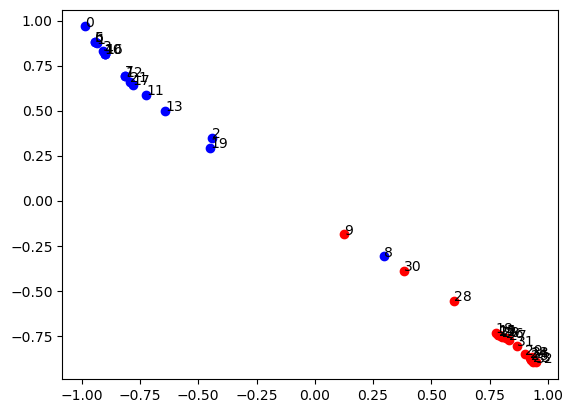

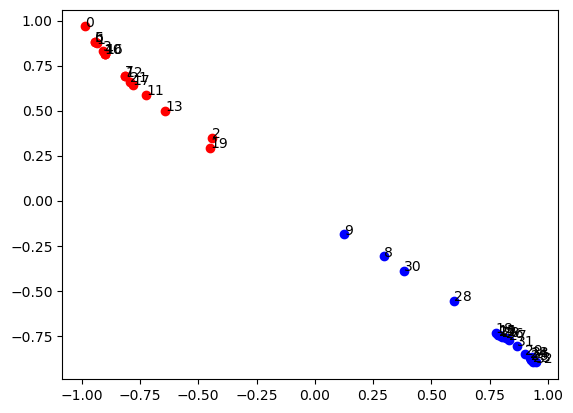

3回目 ARI : 0.8822575413558222

===========================4回目============================
Trained_node_number_is : [0, 4, 6, 10, 19, 23, 24, 27, 30, 32]


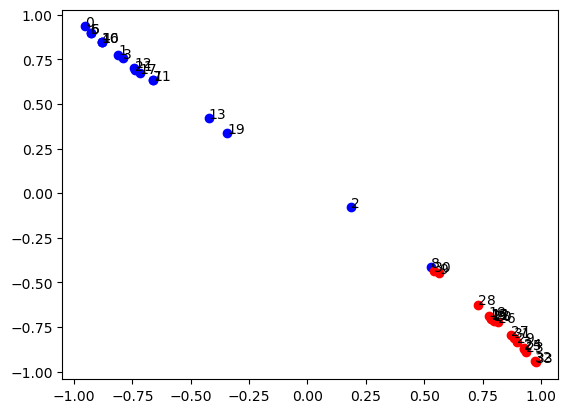

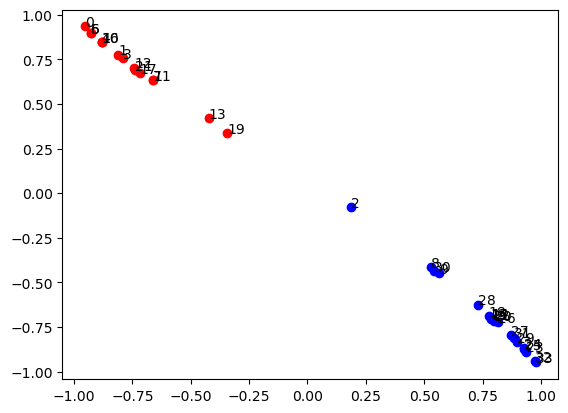

4回目 ARI : 0.7717250324254216

===========================5回目============================
Trained_node_number_is : [0, 2, 4, 7, 8, 11, 14, 17, 19, 32]


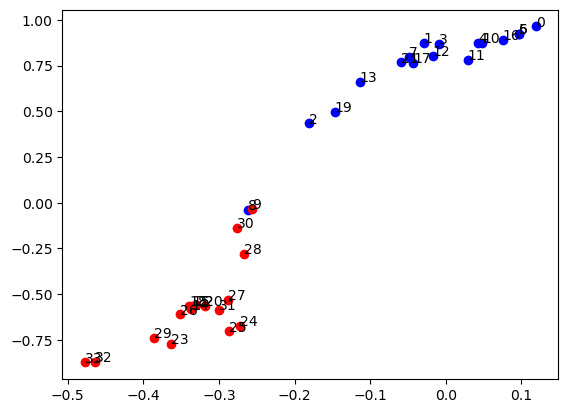

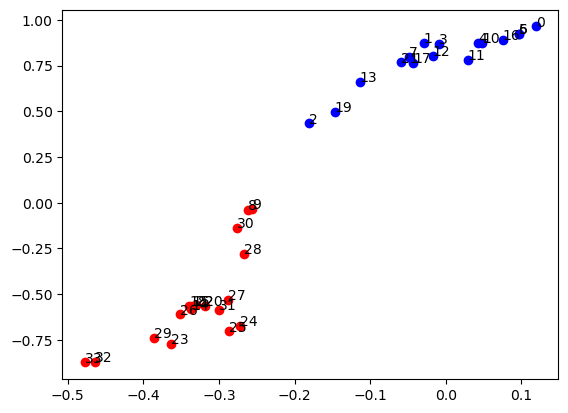

5回目 ARI : 0.8822575413558222

===========================6回目============================
Trained_node_number_is : [0, 4, 7, 12, 14, 18, 21, 22, 23, 33]


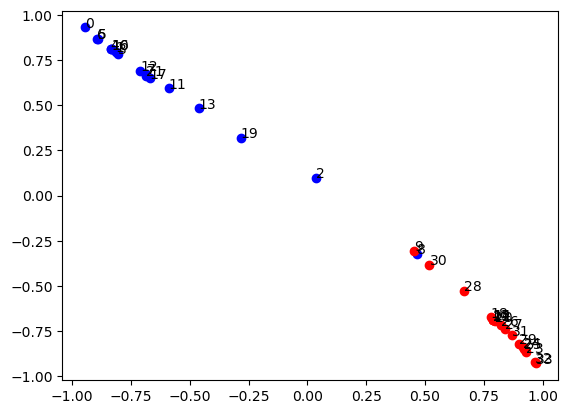

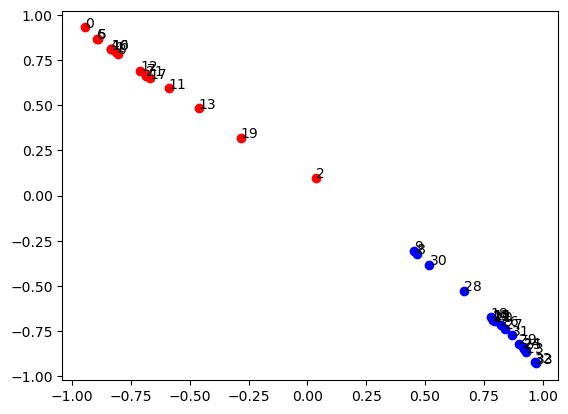

6回目 ARI : 0.8822575413558222

===========================7回目============================
Trained_node_number_is : [1, 2, 5, 7, 11, 13, 16, 18, 22, 33]


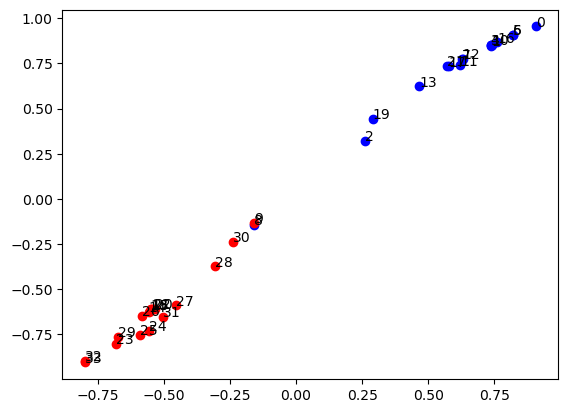

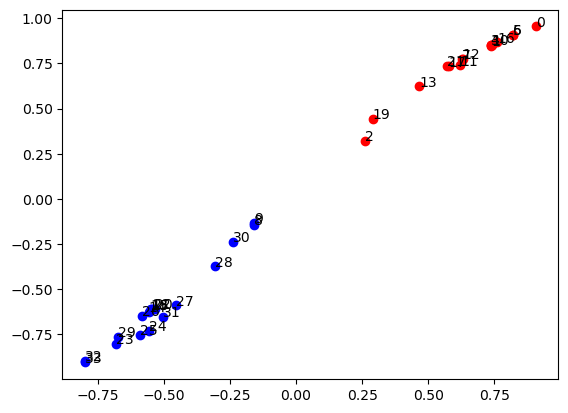

7回目 ARI : 0.8822575413558222

===========================8回目============================
Trained_node_number_is : [3, 6, 7, 8, 10, 12, 15, 19, 27, 30]


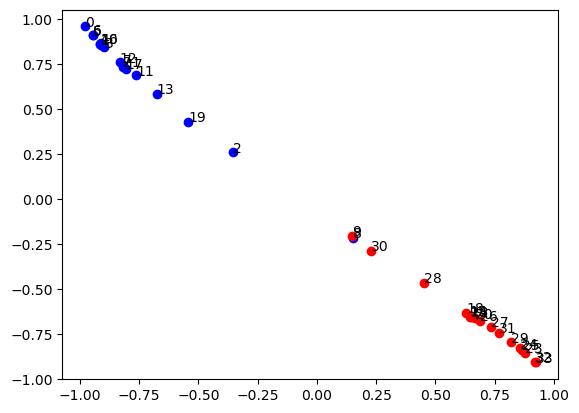

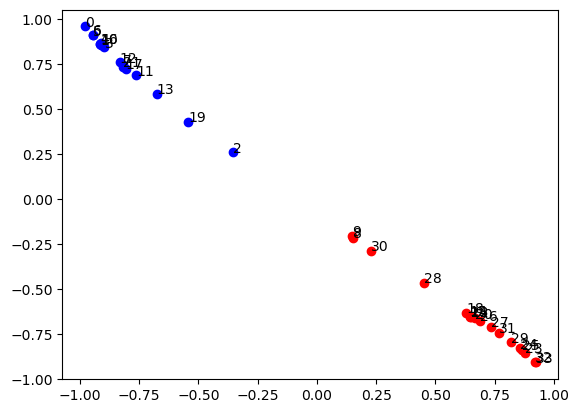

8回目 ARI : 0.8822575413558222

===========================9回目============================
Trained_node_number_is : [0, 4, 5, 16, 18, 24, 25, 28, 29, 32]


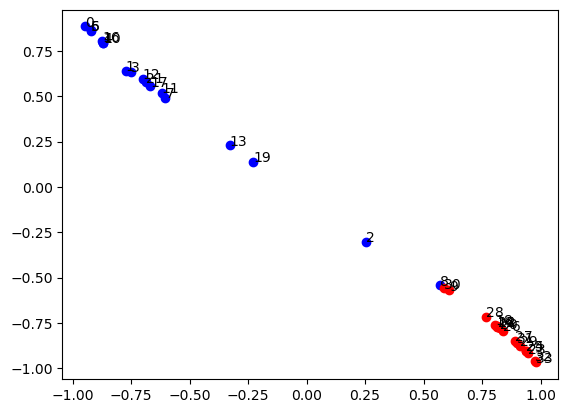

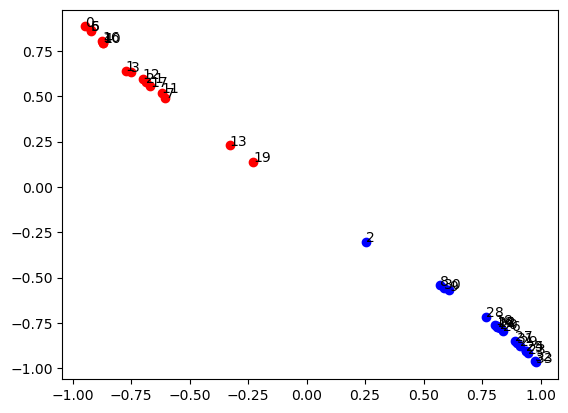

9回目 ARI : 0.7717250324254216

===========================10回目============================
Trained_node_number_is : [0, 6, 10, 15, 17, 19, 24, 26, 30, 32]


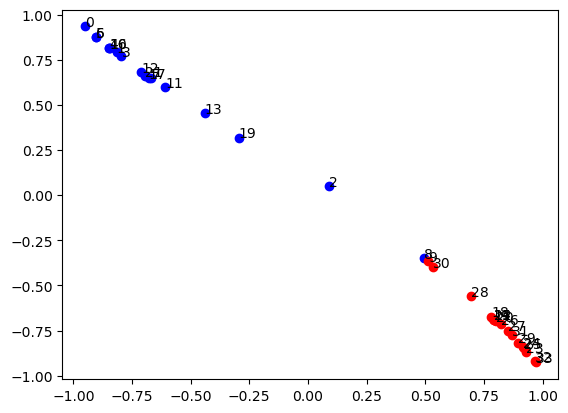

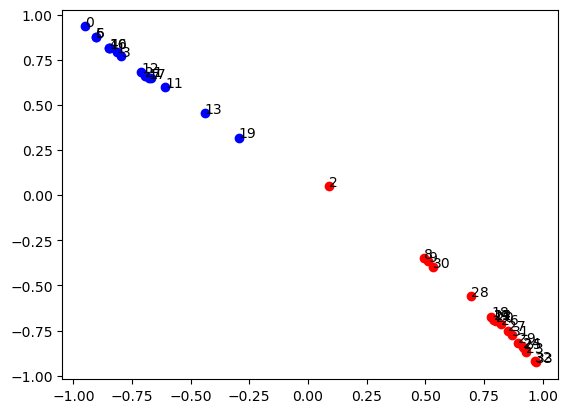

10回目 ARI : 0.7717250324254216

===========================11回目============================
Trained_node_number_is : [4, 6, 22, 23, 24, 25, 27, 29, 31, 32]


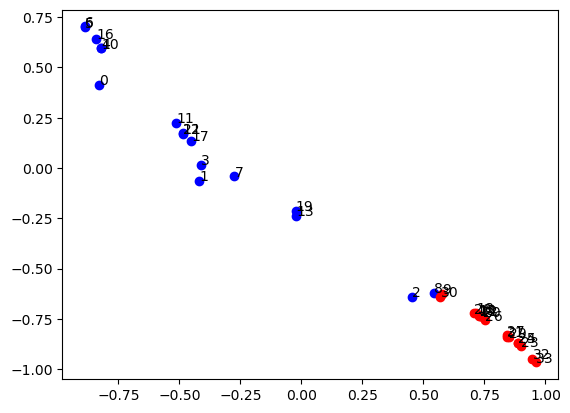

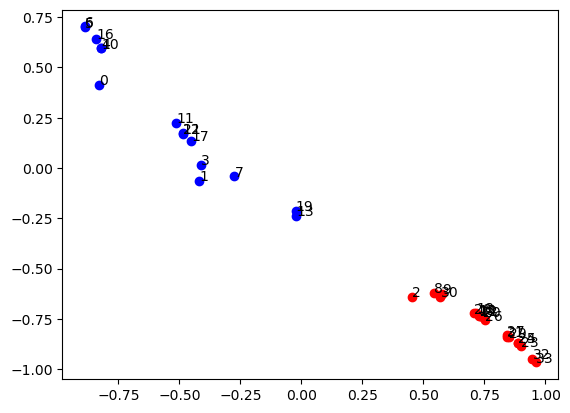

11回目 ARI : 0.7717250324254216

===========================12回目============================
Trained_node_number_is : [2, 3, 8, 10, 14, 16, 20, 26, 28, 33]


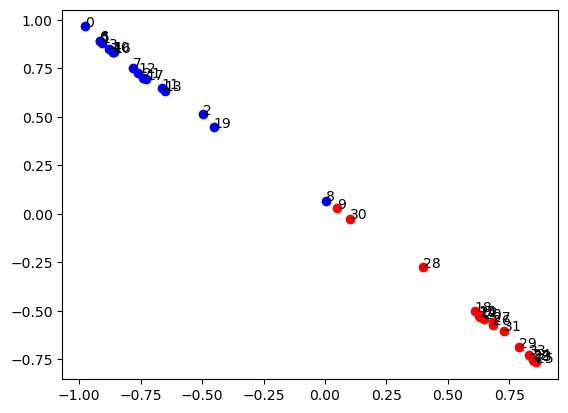

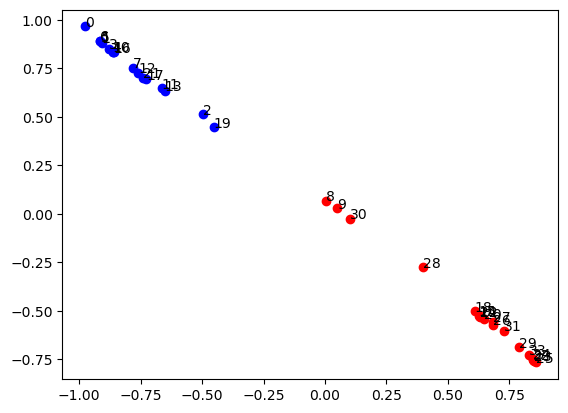

12回目 ARI : 0.8822575413558222

===========================13回目============================
Trained_node_number_is : [0, 1, 2, 5, 7, 11, 13, 18, 26, 28]


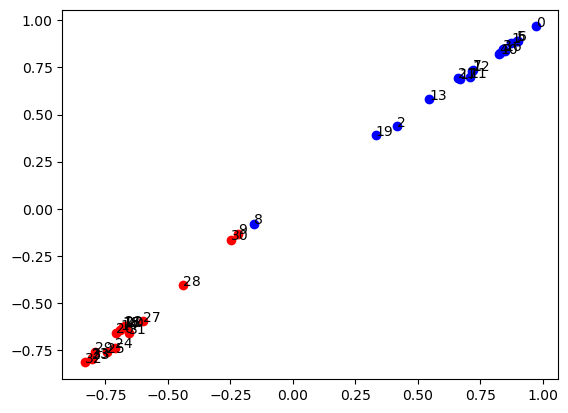

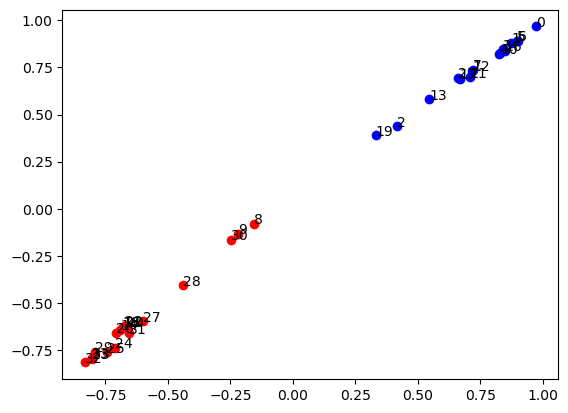

13回目 ARI : 0.8822575413558222

===========================14回目============================
Trained_node_number_is : [1, 2, 3, 7, 10, 13, 15, 16, 21, 23]


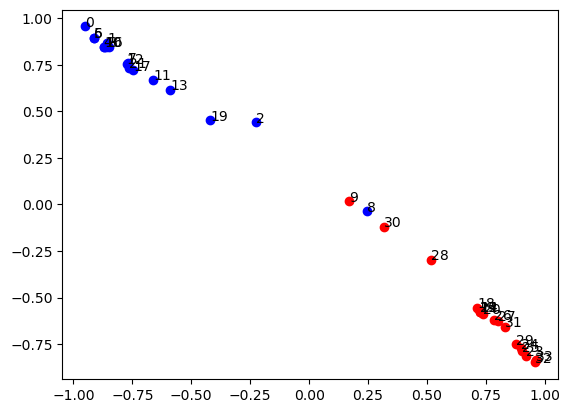

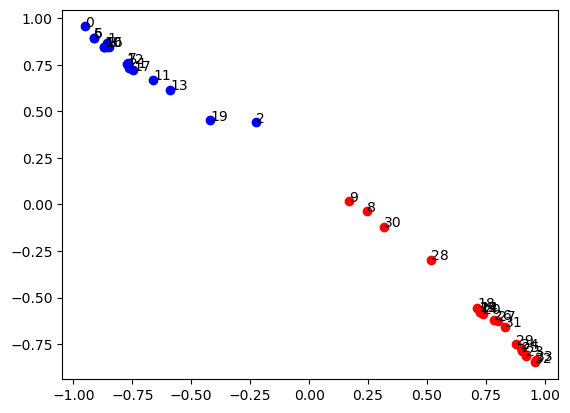

14回目 ARI : 0.8822575413558222

===========================15回目============================
Trained_node_number_is : [2, 4, 11, 15, 20, 21, 22, 27, 28, 31]


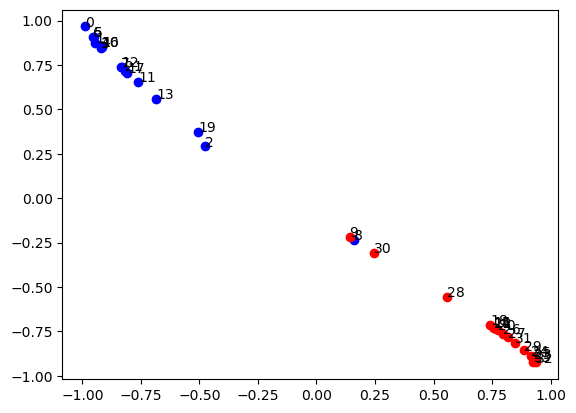

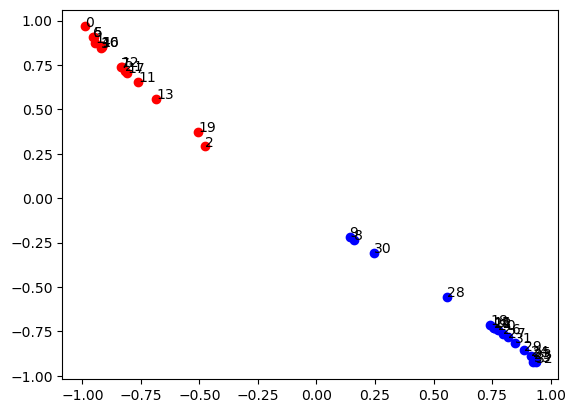

15回目 ARI : 0.8822575413558222

===========================16回目============================
Trained_node_number_is : [0, 7, 8, 12, 13, 14, 17, 25, 27, 29]


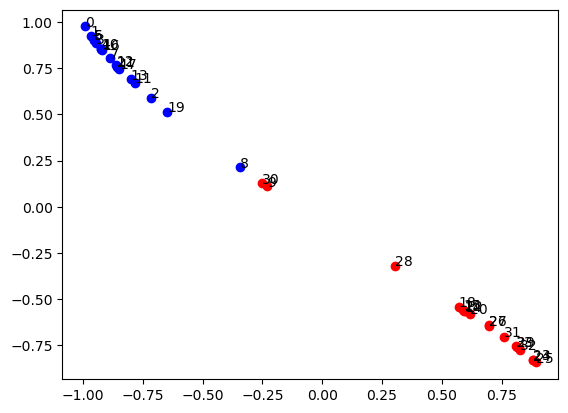

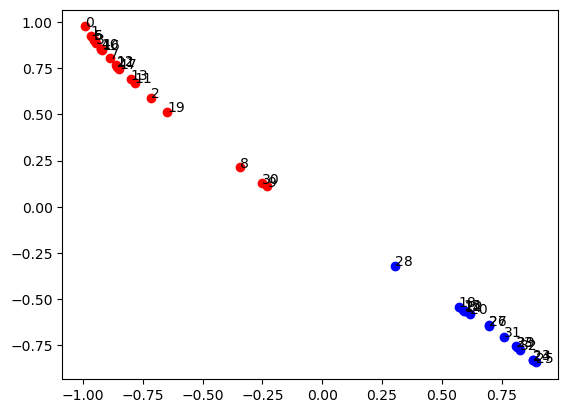

16回目 ARI : 0.7717250324254216

===========================17回目============================
Trained_node_number_is : [2, 3, 5, 6, 8, 15, 18, 19, 29, 33]


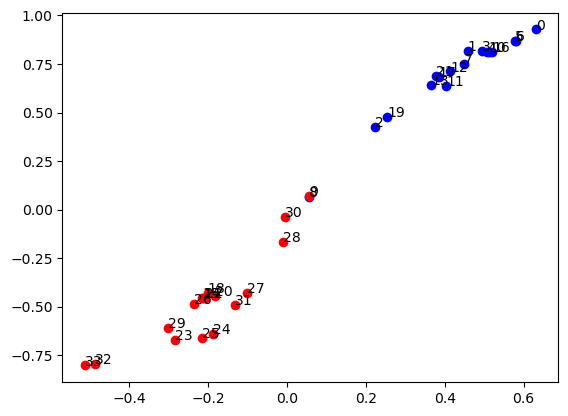

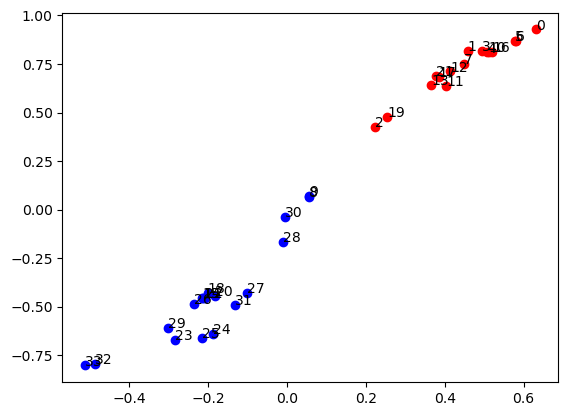

17回目 ARI : 0.8822575413558222

===========================18回目============================
Trained_node_number_is : [0, 3, 8, 12, 14, 17, 18, 19, 25, 29]


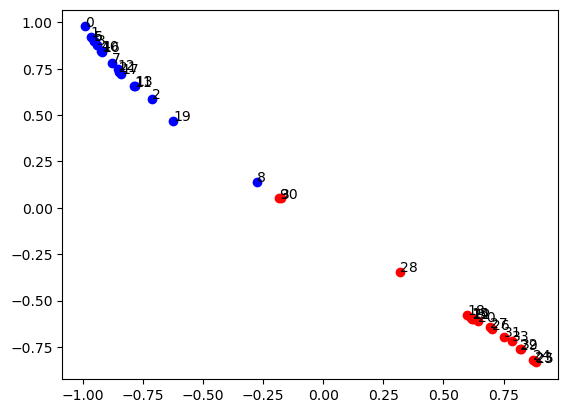

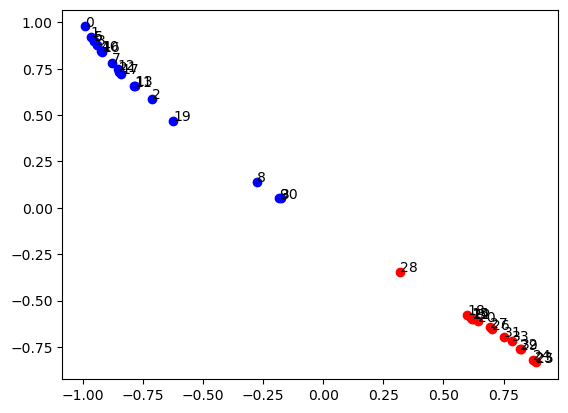

18回目 ARI : 0.7717250324254216

===========================19回目============================
Trained_node_number_is : [1, 6, 10, 14, 16, 19, 21, 22, 26, 33]


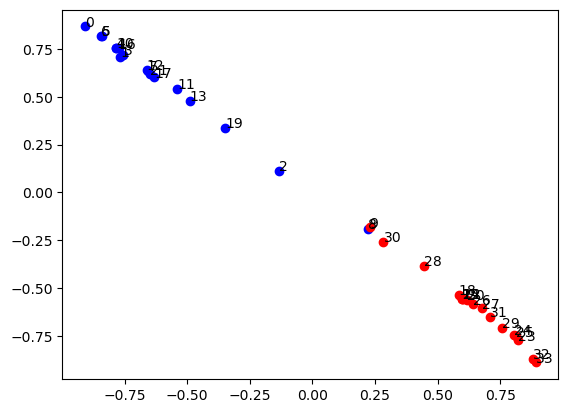

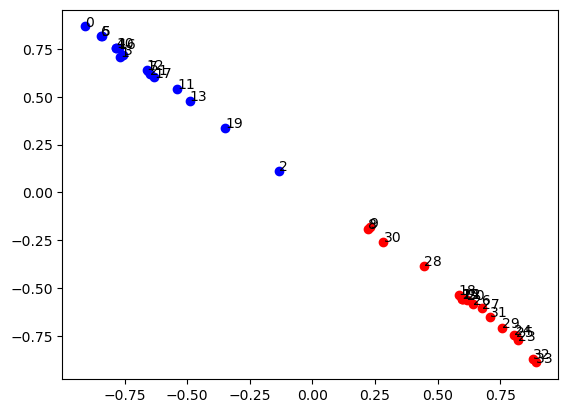

19回目 ARI : 0.8822575413558222

===========================20回目============================
Trained_node_number_is : [0, 2, 3, 4, 10, 13, 15, 17, 23, 31]


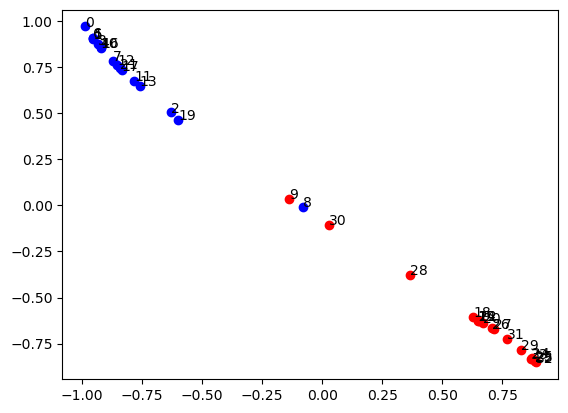

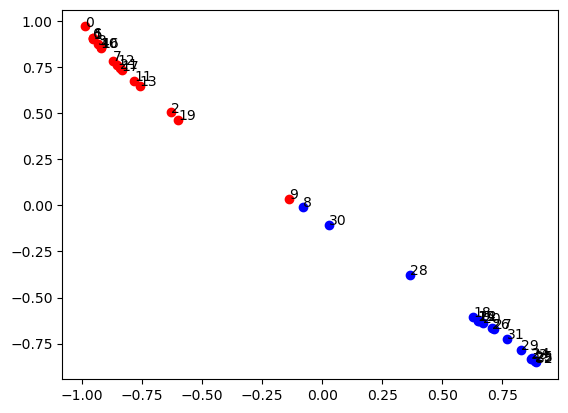

20回目 ARI : 0.7716262975778547

===========================21回目============================
Trained_node_number_is : [6, 7, 8, 10, 17, 18, 22, 26, 31, 32]


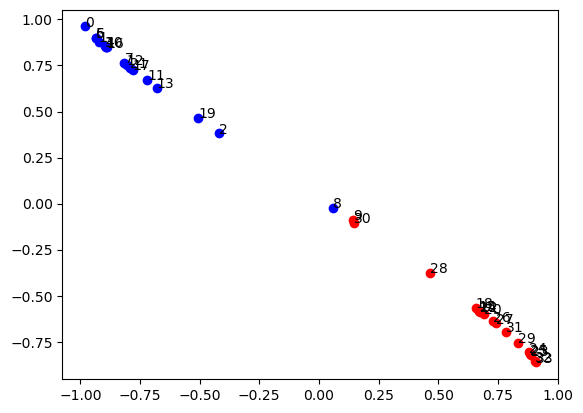

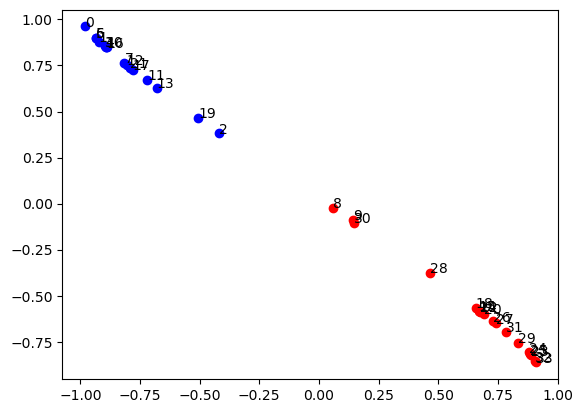

21回目 ARI : 0.8822575413558222

===========================22回目============================
Trained_node_number_is : [3, 7, 8, 9, 18, 23, 24, 25, 30, 32]


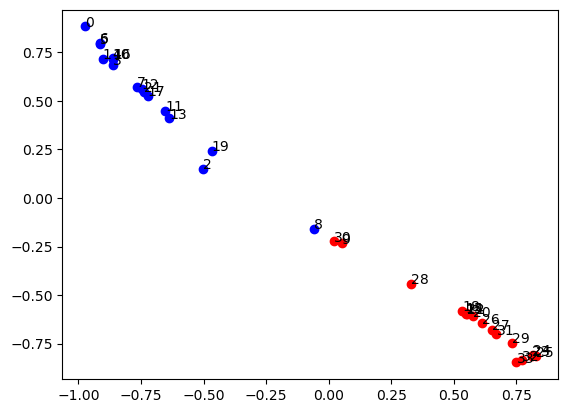

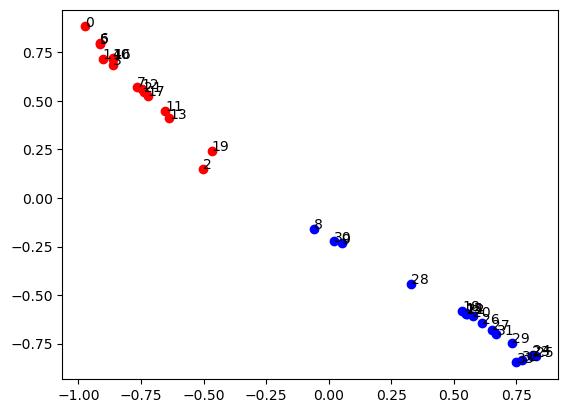

22回目 ARI : 0.8822575413558222

===========================23回目============================
Trained_node_number_is : [5, 11, 16, 17, 18, 21, 22, 28, 30, 31]


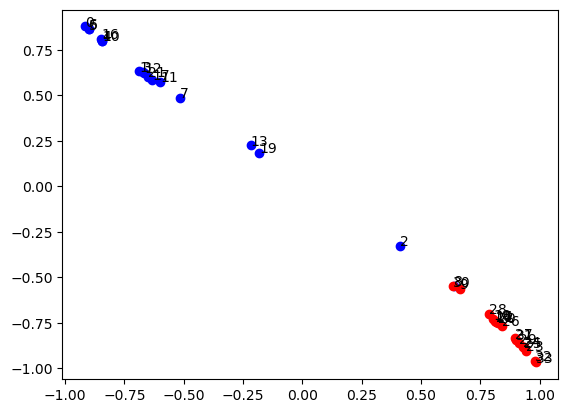

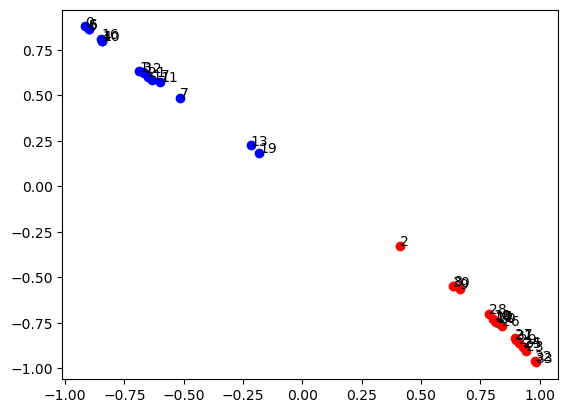

23回目 ARI : 0.7717250324254216

===========================24回目============================
Trained_node_number_is : [4, 6, 7, 8, 9, 11, 17, 20, 23, 31]


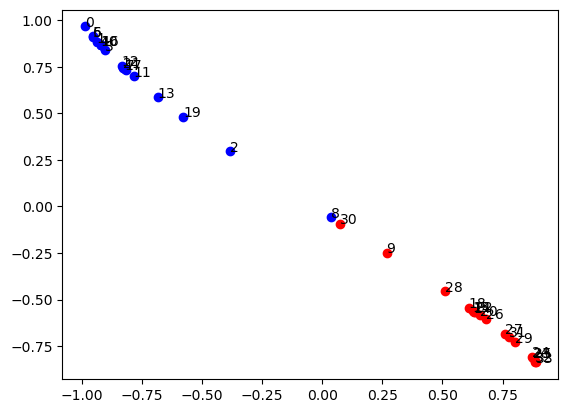

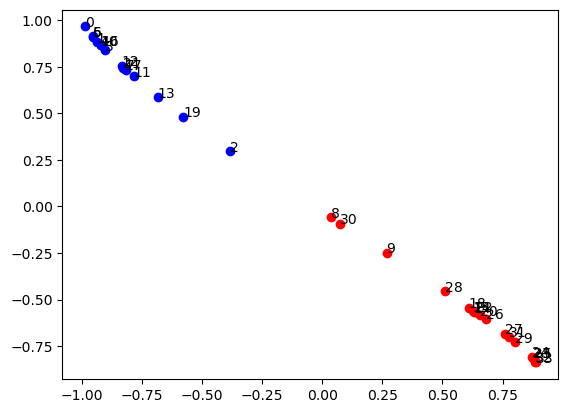

24回目 ARI : 0.8822575413558222

===========================25回目============================
Trained_node_number_is : [1, 8, 15, 16, 21, 22, 24, 26, 30, 32]


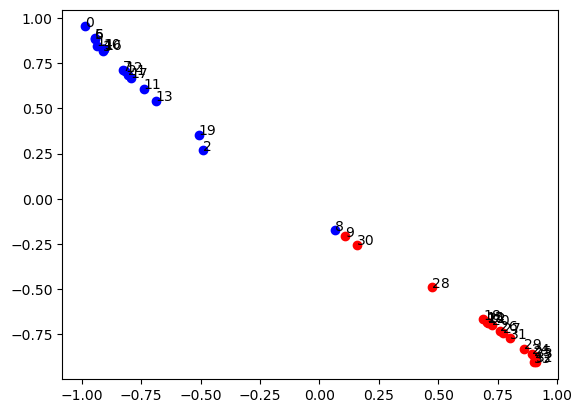

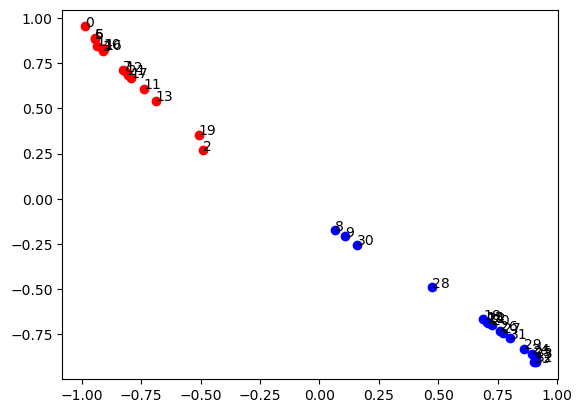

25回目 ARI : 0.8822575413558222

===========================26回目============================
Trained_node_number_is : [1, 4, 5, 7, 8, 12, 13, 18, 24, 32]


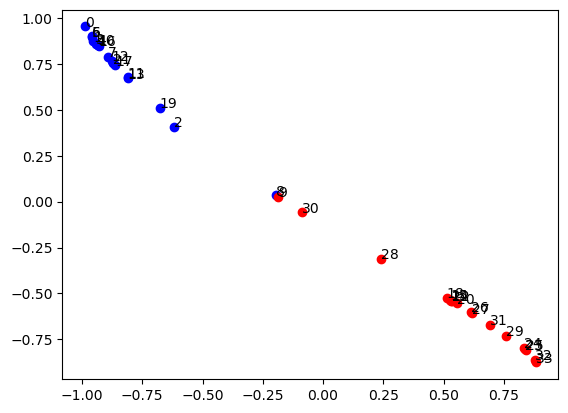

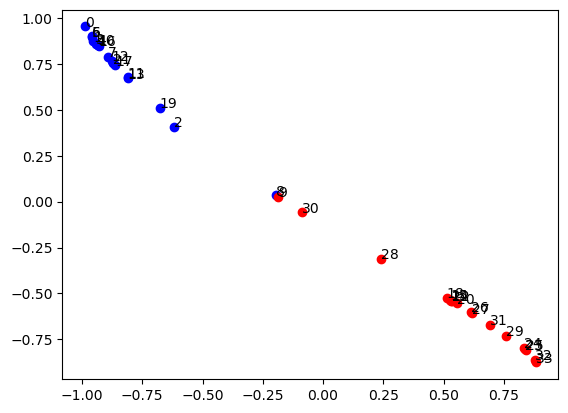

26回目 ARI : 1.0

===========================27回目============================
Trained_node_number_is : [0, 2, 5, 7, 8, 18, 24, 27, 29, 33]


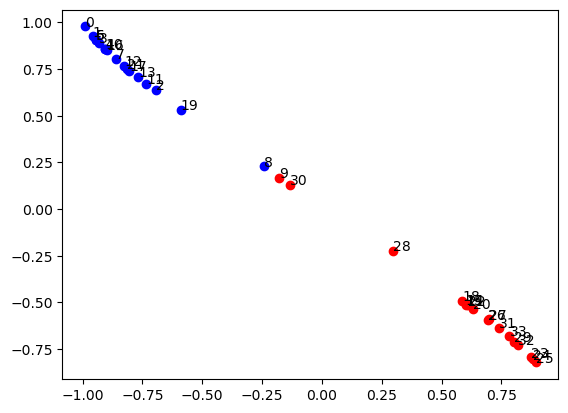

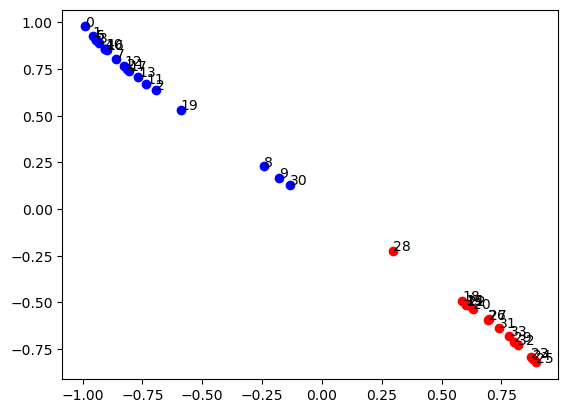

27回目 ARI : 0.7717250324254216

===========================28回目============================
Trained_node_number_is : [5, 6, 7, 9, 11, 14, 17, 18, 26, 32]


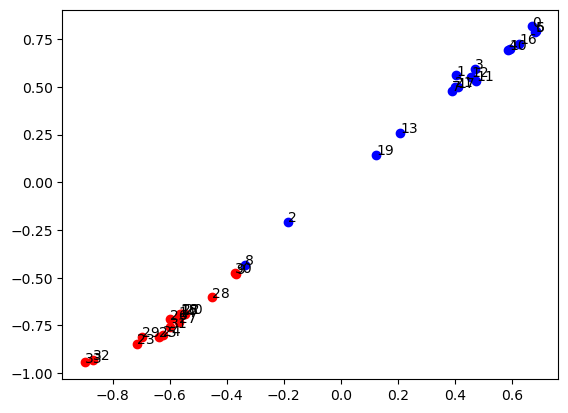

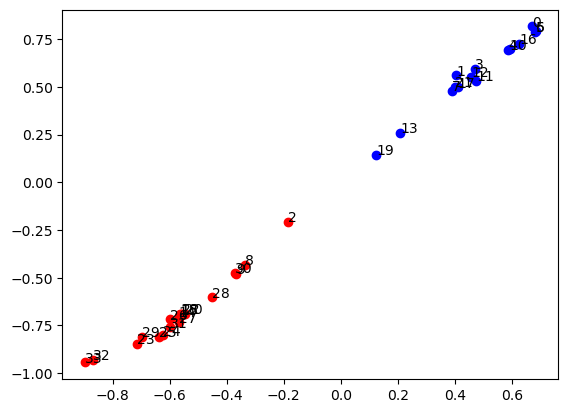

28回目 ARI : 0.7717250324254216

===========================29回目============================
Trained_node_number_is : [3, 5, 7, 10, 14, 18, 23, 24, 31, 33]


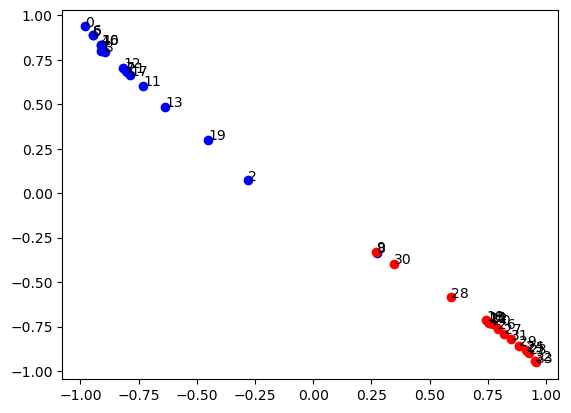

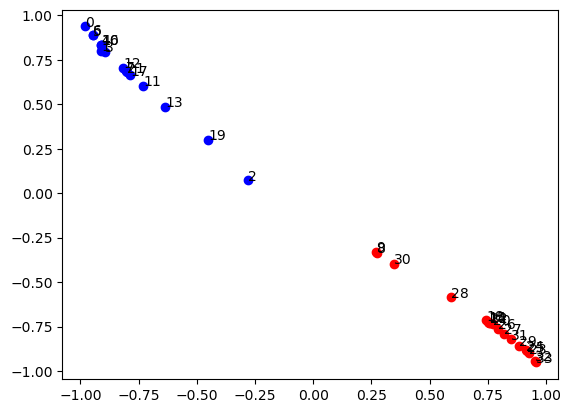

29回目 ARI : 0.8822575413558222

===========================30回目============================
Trained_node_number_is : [2, 8, 13, 14, 15, 16, 18, 22, 25, 26]


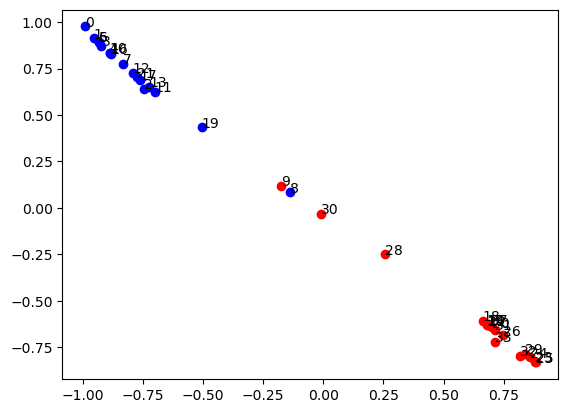

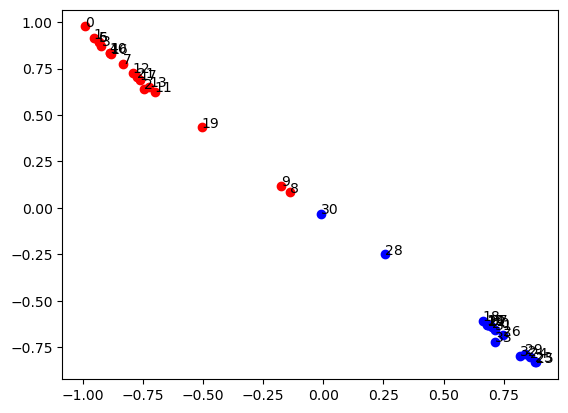

30回目 ARI : 0.8822575413558222

===========================31回目============================
Trained_node_number_is : [0, 3, 9, 13, 15, 16, 21, 29, 30, 33]


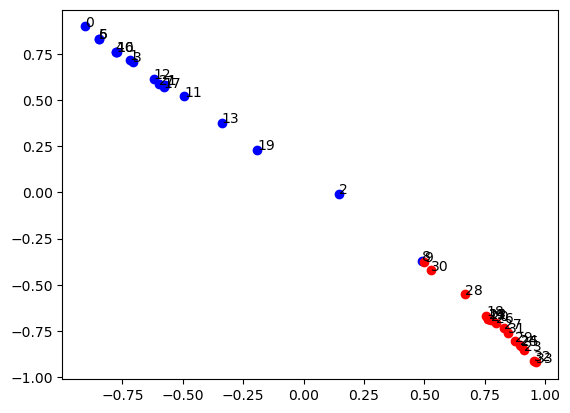

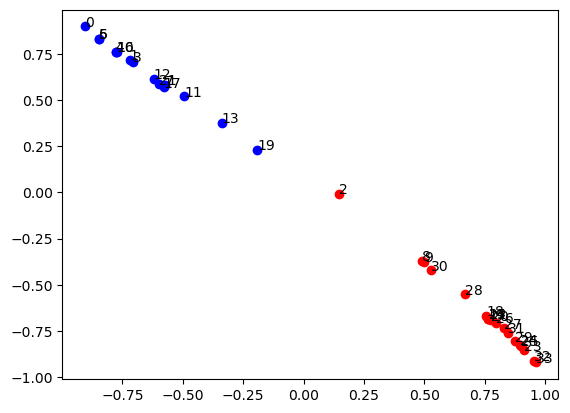

31回目 ARI : 0.7717250324254216

===========================32回目============================
Trained_node_number_is : [6, 13, 14, 15, 16, 17, 24, 25, 26, 31]


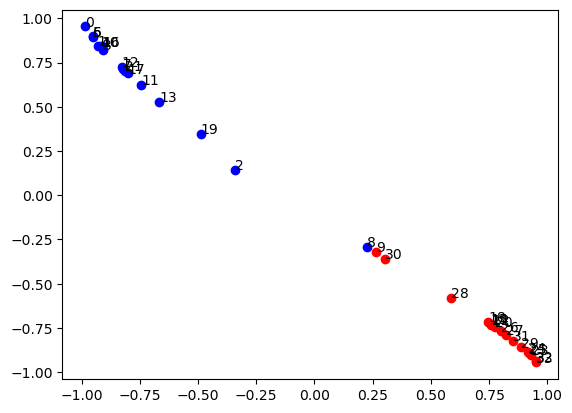

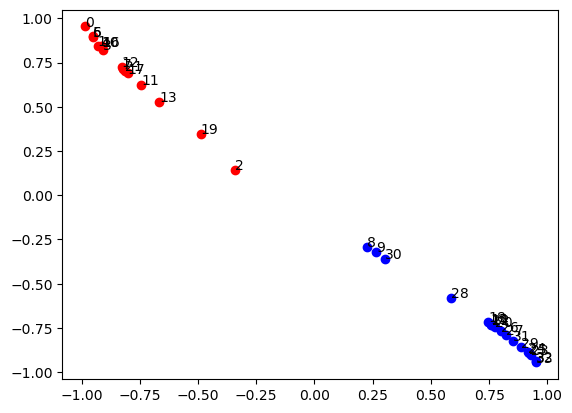

32回目 ARI : 0.8822575413558222

===========================33回目============================
Trained_node_number_is : [8, 10, 12, 13, 17, 20, 26, 29, 30, 32]


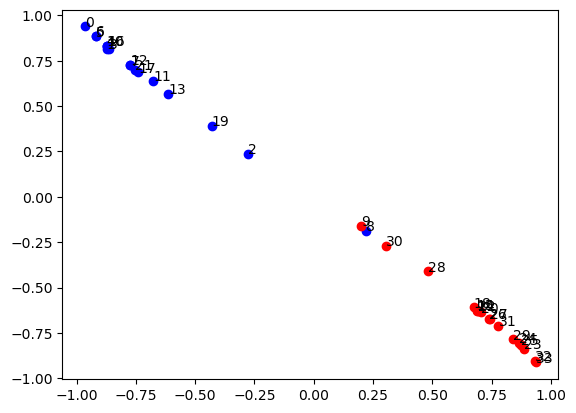

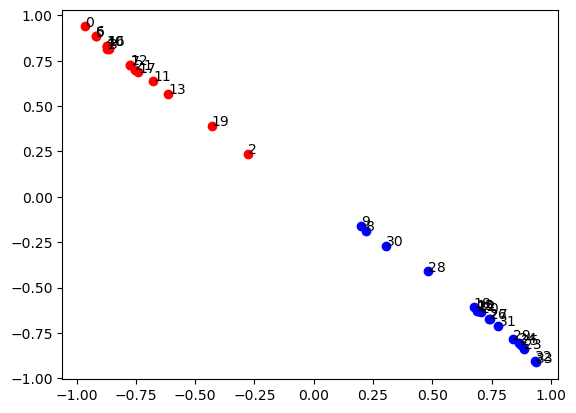

33回目 ARI : 0.8822575413558222

===========================34回目============================
Trained_node_number_is : [2, 9, 16, 17, 21, 23, 25, 26, 27, 29]


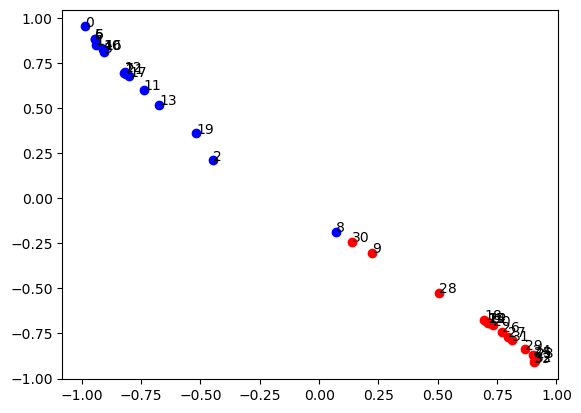

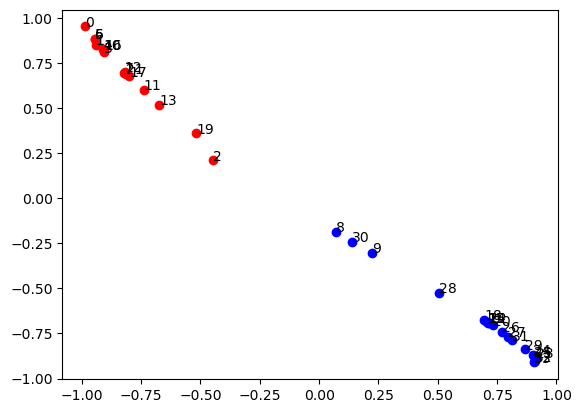

34回目 ARI : 0.8822575413558222

===========================35回目============================
Trained_node_number_is : [1, 8, 9, 16, 22, 23, 24, 26, 31, 33]


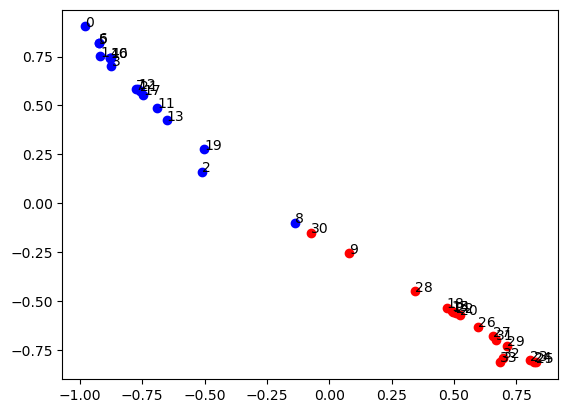

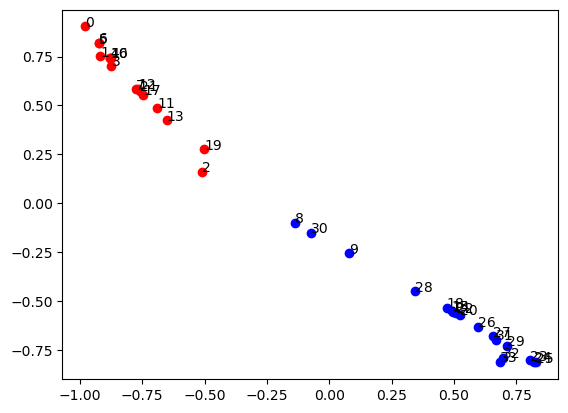

35回目 ARI : 0.8822575413558222

===========================36回目============================
Trained_node_number_is : [2, 10, 11, 16, 17, 22, 26, 28, 29, 32]


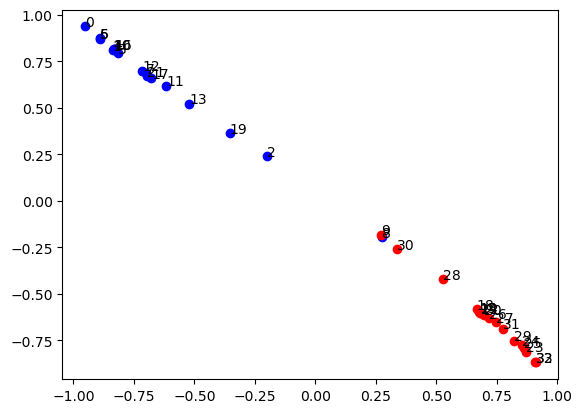

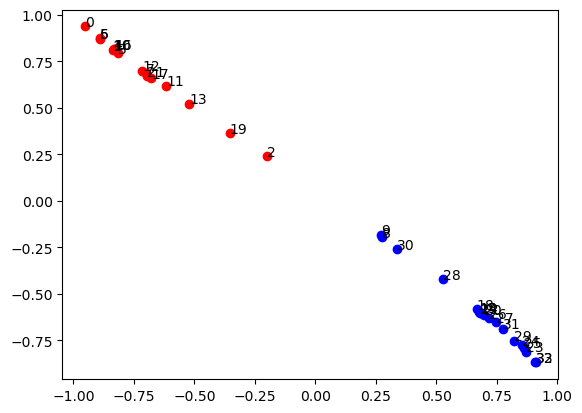

36回目 ARI : 0.8822575413558222

===========================37回目============================
Trained_node_number_is : [4, 6, 11, 15, 17, 20, 21, 23, 24, 29]


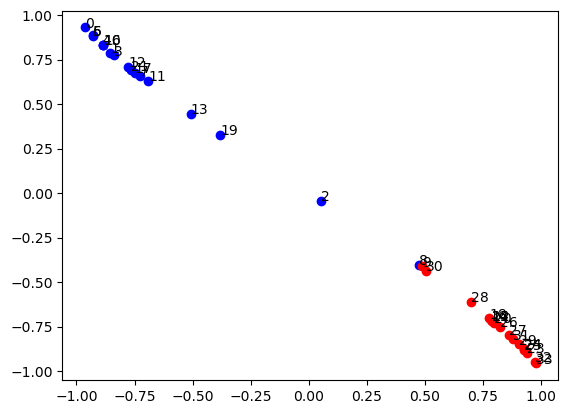

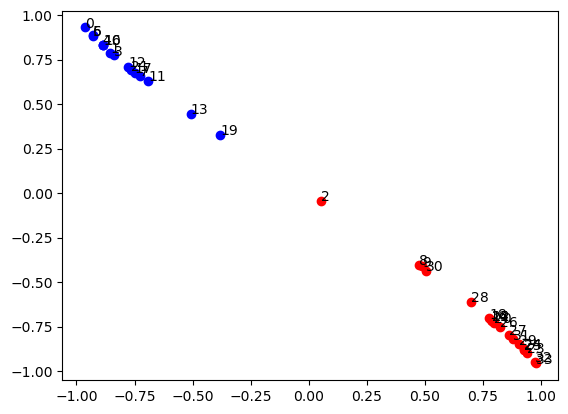

37回目 ARI : 0.7717250324254216

===========================38回目============================
Trained_node_number_is : [1, 4, 8, 14, 16, 19, 21, 26, 27, 28]


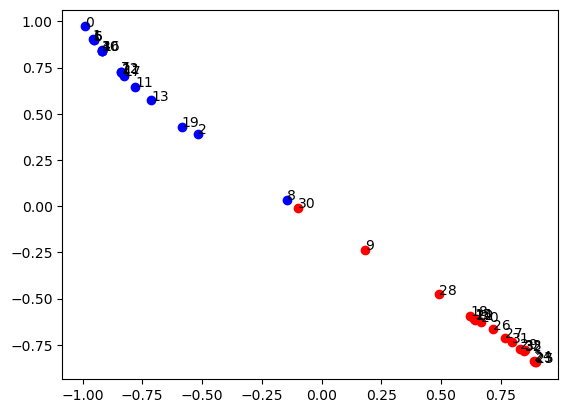

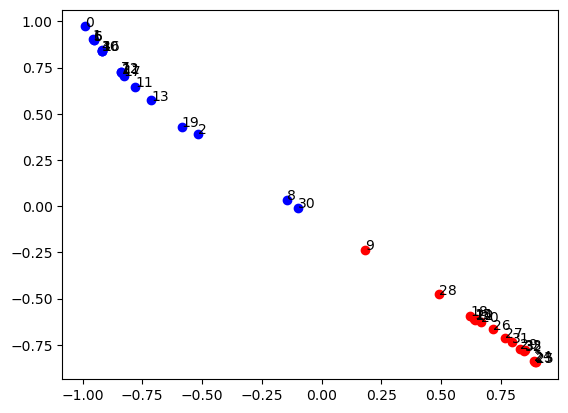

38回目 ARI : 0.8822575413558222

===========================39回目============================
Trained_node_number_is : [0, 4, 6, 8, 15, 16, 18, 25, 28, 31]


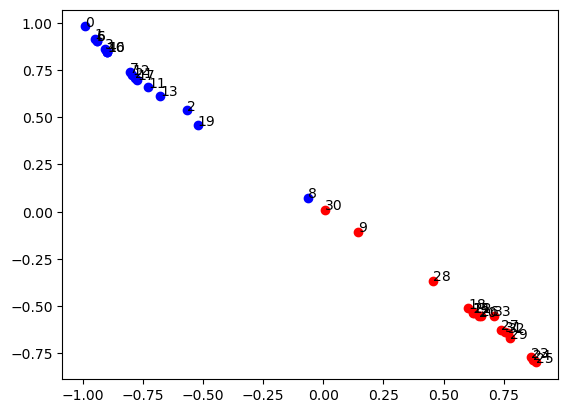

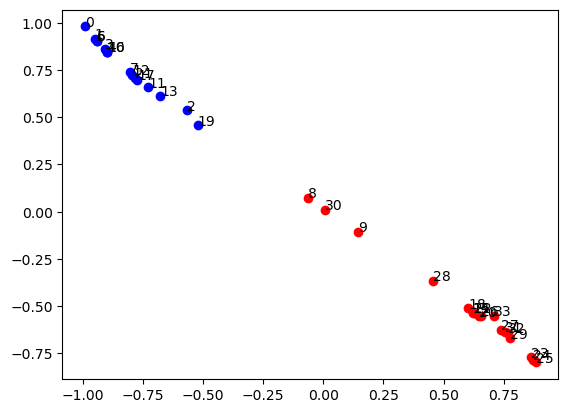

39回目 ARI : 0.8822575413558222

===========================40回目============================
Trained_node_number_is : [3, 6, 7, 9, 10, 13, 21, 23, 25, 28]


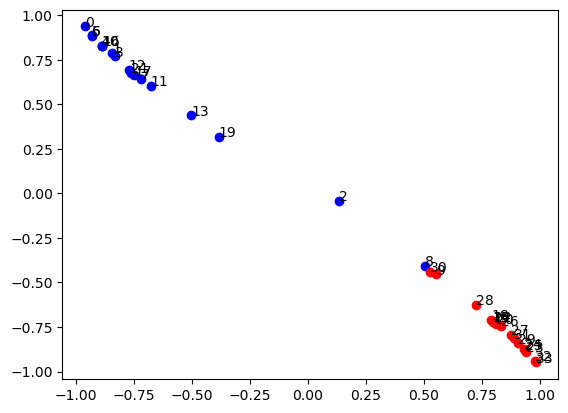

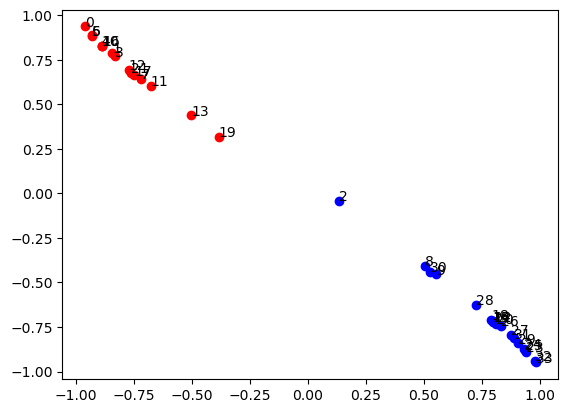

40回目 ARI : 0.7717250324254216

===========================41回目============================
Trained_node_number_is : [1, 4, 8, 9, 13, 18, 19, 23, 27, 29]


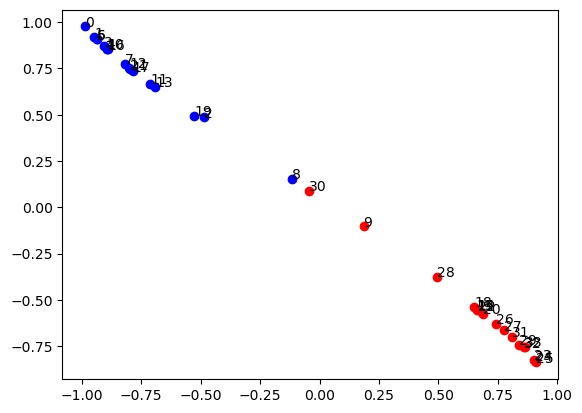

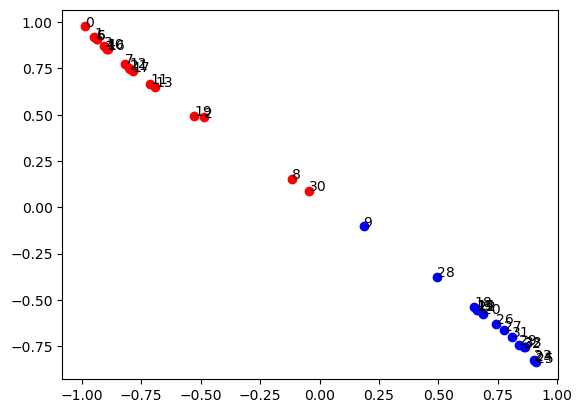

41回目 ARI : 0.8822575413558222

===========================42回目============================
Trained_node_number_is : [1, 10, 14, 15, 16, 20, 22, 27, 28, 32]


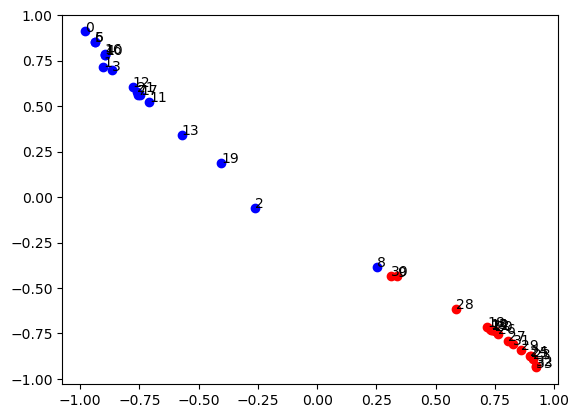

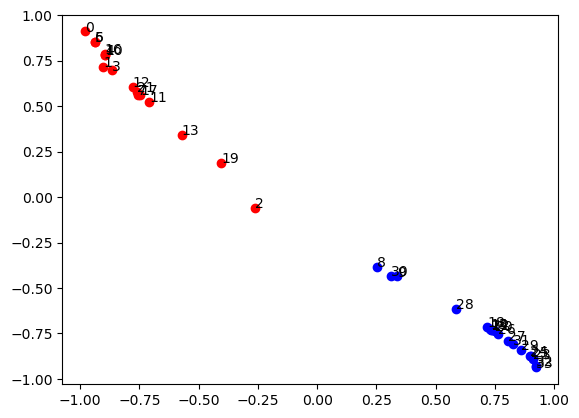

42回目 ARI : 0.8822575413558222

===========================43回目============================
Trained_node_number_is : [0, 1, 2, 6, 10, 11, 15, 21, 32, 33]


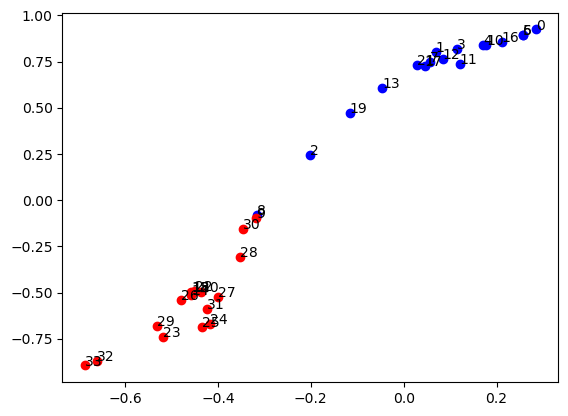

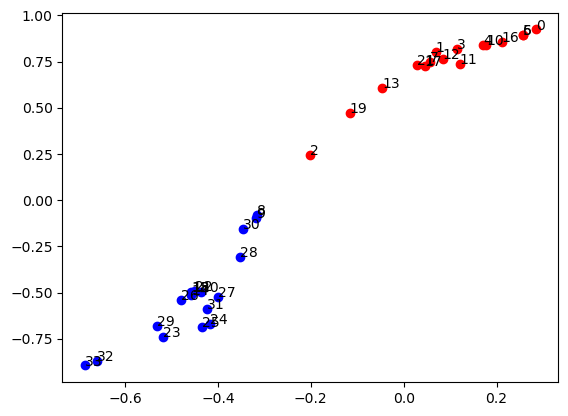

43回目 ARI : 0.8822575413558222

===========================44回目============================
Trained_node_number_is : [4, 9, 10, 11, 12, 17, 19, 20, 22, 29]


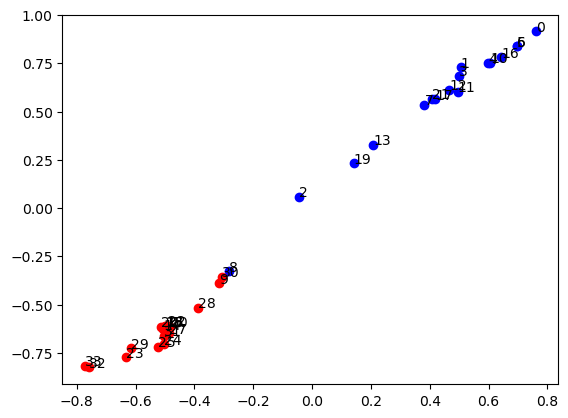

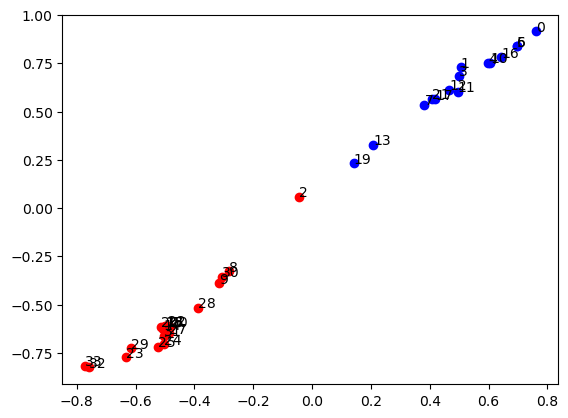

44回目 ARI : 0.7717250324254216

===========================45回目============================
Trained_node_number_is : [2, 6, 9, 12, 13, 15, 18, 19, 21, 30]


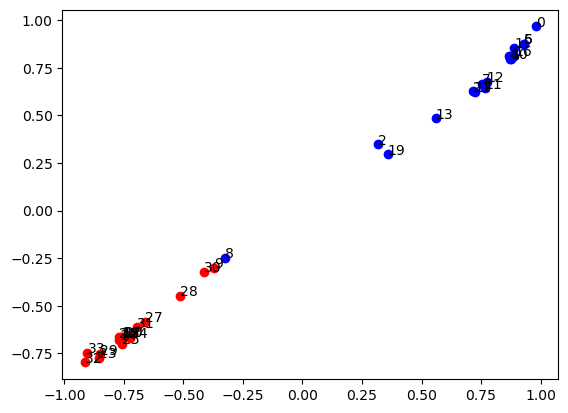

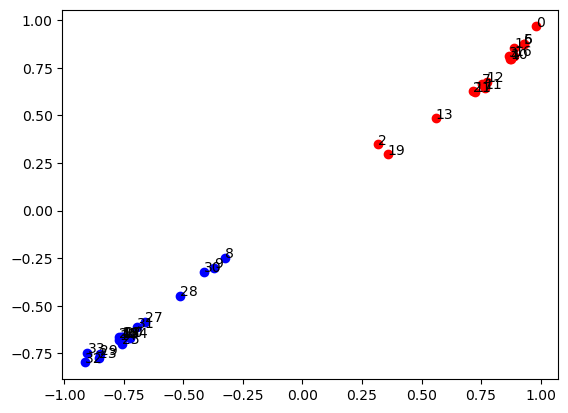

45回目 ARI : 0.8822575413558222

===========================46回目============================
Trained_node_number_is : [7, 9, 14, 15, 19, 21, 27, 28, 29, 32]


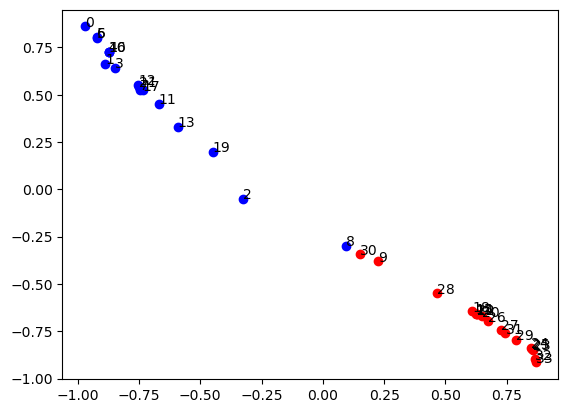

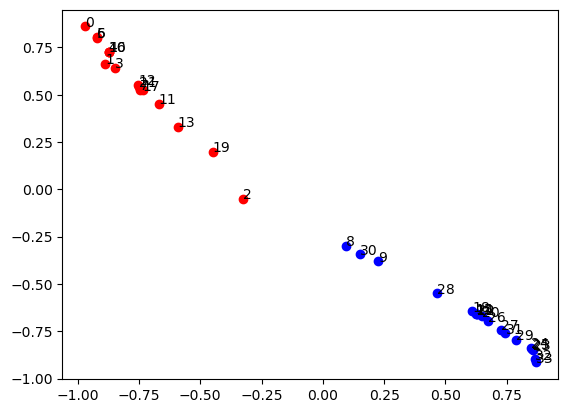

46回目 ARI : 0.8822575413558222

===========================47回目============================
Trained_node_number_is : [1, 5, 7, 9, 13, 26, 28, 30, 32, 33]


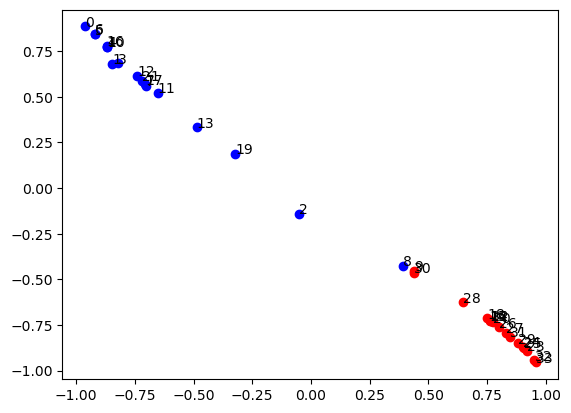

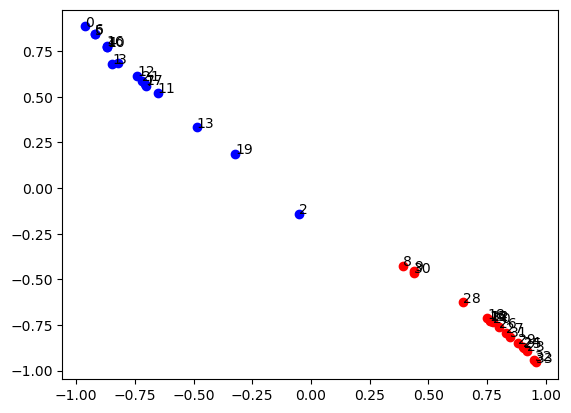

47回目 ARI : 0.8822575413558222

===========================48回目============================
Trained_node_number_is : [5, 10, 15, 17, 20, 25, 26, 29, 30, 31]


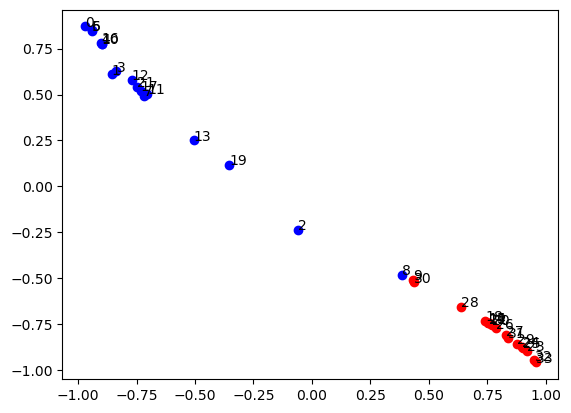

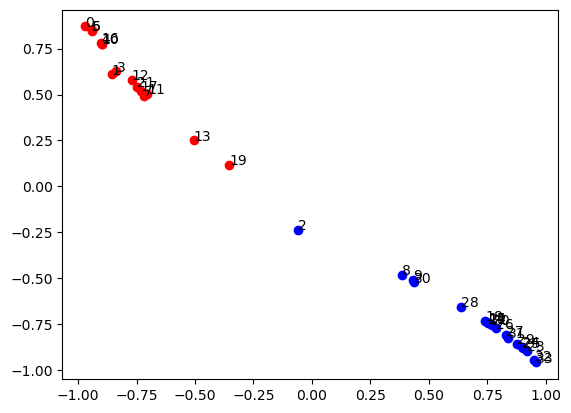

48回目 ARI : 0.7717250324254216

===========================49回目============================
Trained_node_number_is : [4, 5, 9, 10, 13, 14, 18, 21, 27, 28]


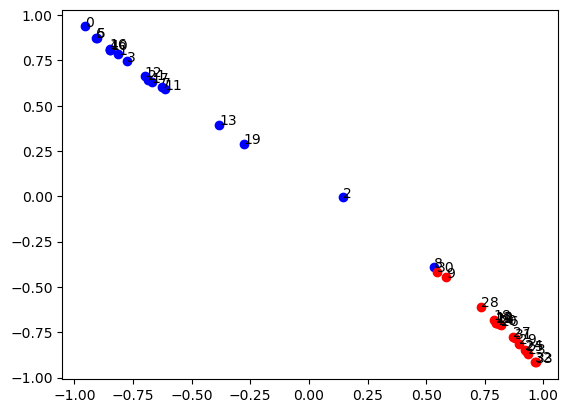

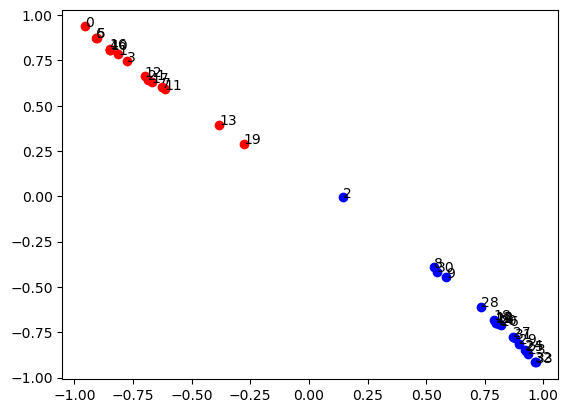

49回目 ARI : 0.7717250324254216

===========================50回目============================
Trained_node_number_is : [6, 7, 9, 12, 14, 18, 20, 22, 29, 32]


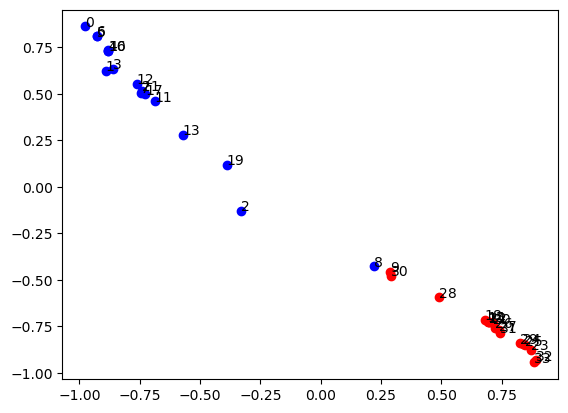

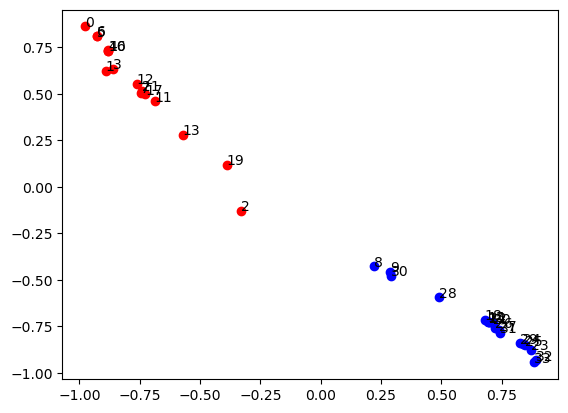

50回目 ARI : 0.8822575413558222

最大ARI([0, 25]回目実行) : 1.0
最小ARI([19]回目実行) : 0.7716262975778547


In [4]:
ARI_list, max_EVM, min_EVM ,pred= gcn.exec_to_kmedoids(TIMES,TRAIN_ALL,DEFAULT,NUM_TRAIN,EPOCH,VIEW_TRAIN)

In [11]:
with open('gcn_label.txt','w') as f:
    for i in range(len(pred)):
        if i+1 ==len(pred):
            f.write(str(pred[i]))
        else:
            f.write(str(pred[i])+',')


In [14]:
adjusted_rand_score(gcn.draw_karateclub(False), pred)


0.8822575413558222